In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gradient Descent (Advanced)

In this exercise, you will

- Code your own gradient descent in vectorized form for a high-dimension loss function
- Finetune your choice of number of epochs on gradient descent

## 1. Our dataset

We are going to study the [diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) and try to predict the **intensity of the disease** based on **10 quantitative features** such as body-mass-index, age, etc...(regression problem)

In [2]:
from sklearn import datasets
X,y = datasets.load_diabetes(return_X_y=True, as_frame=True)
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [3]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


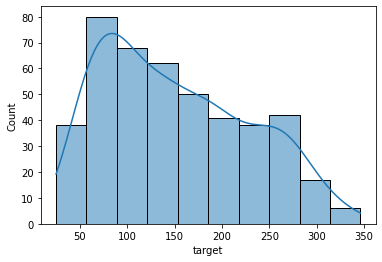

In [4]:
sns.histplot(y, kde=True);

## 2. Code your vectorial gradient descent

We're modeling a linear regression $\hat{y} = X\beta$

<img src = "https://github.com/lewagon/data-images/blob/master/ML/linear_reg_matrix_multiplication.png?raw=true">

So, first, let's add an "intercept" column of "ones" to our feature matrix X

In [5]:
# Let's add an intercept column of "ones" 
X = np.hstack((X, np.ones((X.shape[0],1))))
X.shape

(442, 11)

In [6]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,1.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,1.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,1.0


We create for you a train test split with `test_size=0.3` and `random_state=1` (so we all have same results)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


Let's recall the definition of the gradient descent algorithm

$$\text{Gradient descent - vector formula}$$
$$\beta^{\color {red}{(k+1)}} = \beta^{\color {red}{(k)}} - \eta \ \nabla L(\beta^{\color{red}{(k)}})$$

The MSE Loss for an OLS regression is

$$L(\beta) = \frac{1}{n}\|X \beta - y\|^2 = \frac{1}{n}(X \beta - y)^T(X \beta - y)$$

and its gradient is
$${\displaystyle \nabla L(\beta)=
{\begin{bmatrix}{\frac {\partial L}{\partial \beta_{0}}}(\beta)\\\vdots \\{\frac {\partial L}{\partial \beta_{p}}}(\beta)\end{bmatrix}} = \frac{2}{n} X^T (X\beta - y) 
}$$

Let's store our main problem parameters below:

In [8]:
# n observations
n = X.shape[0] 
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# p features (including intercept)
p = X.shape[1]

# Gradient Descent hyper-params
eta = 0.1
n_epochs= 100

❓ Initialize a $\beta$ vector of zeros of shape **p**

In [9]:
beta = np.zeros(p)

beta.shape

(11,)

❓ Using the vectorized formula given above, create a gradient descent that loops over `n_epochs` to find the best $\beta$ of an OLS using the `train` set
- make use of numpy's matrix operations and broadcasting capabilities
- this shouldn't take more than 4 lines of code!

In [10]:
# Code your gradient descent in less than 4 lines of code

In [11]:
for epoch in range(n_epochs):
    gradient = 2 / n_train * np.dot(X_train.T,(np.dot(X_train, beta) - y_train))
    beta = beta - eta * gradient

In [12]:
# print best beta
print('best beta: ', beta)

best beta:  [ 13.88877812   1.6767504   45.64204342  31.67134515  13.17780485
   9.52749193 -28.21620784  30.03382058  41.48427879  27.12324669
 153.73815888]


## Predict

❓Compute predictions on your test set (`y_pred`), the resulting `loss_test` (MSE loss for OLS).

In [13]:
# Compute y_pred
y_pred_train = X_train.dot(beta)
y_pred_test = X_test.dot(beta)

In [14]:
# Print test loss and train loss
from sklearn.metrics import mean_squared_error
print('Train Loss: ', mean_squared_error(y_train, y_pred_train))
print('Test Loss: ', mean_squared_error(y_test, y_pred_test))

Train Loss:  5536.456061612208
Test Loss:  4477.6183367564


## Wrap these into a function `gradient_decent`

❓ Wrap this logic into a function `gradient_descent`, which takes as input some (`X_train`, `y_train`, `X_test`, `y_test`, `eta`, `n_epoch`) values, and returns:
- the final value for $\beta$ fitted on the train set
- the values of the `loss_train` at each epoch as a list `loss_train_history`
- the values of the `loss_test` at each epoch as a list `loss_test_history`
- (optional) make the function robust to call with only a train_set

In [15]:
def gradient_descent(X_train, y_train, X_test, y_test, eta=eta, n_epochs=100):
        
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]
    
    beta = np.zeros(p)
    
    loss_train_history = []
    loss_test_history = []
    
    # $CHALLENGIFY_BEGIN
    for epoch in range(n_epochs):
        
        # Descent gradient
        gradients = 2/n_train * X_train.T.dot(X_train.dot(beta) - y_train) 
        beta = beta - eta * gradients
        
        # Compute loss histories
        y_pred_train = X_train.dot(beta)
        y_pred_test = X_test.dot(beta)
        
        loss_train = 1/n_train*(y_pred_train - y_train).T.dot(y_pred_train - y_train)
        loss_test = 1/n_test*(y_pred_test - y_test).T.dot(y_pred_test - y_test)
        
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)
    # $CHALLENGIFY_END
        
    return beta, loss_train_history, loss_test_history

## Early stopping criteria?

❓Plot the loss as a function of epochs, on your train dataset. 
- Try it with `n_epochs=10000` and `eta=0.1`
- Zoom in with `plt.ylim(ymin=2800, ymax=3000)` to see the behavior of the loss function on the test set
- What can you conclude? Should you always "descend" down to the absolute minimum?

In [16]:
(beta, loss_train_history, loss_test_history) =\
gradient_descent(X_train, y_train, X_test, y_test, eta=0.1, n_epochs=10000)

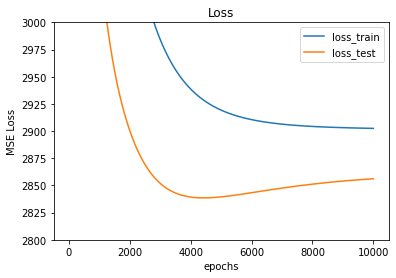

In [17]:
plt.plot(loss_train_history, label='loss_train')
plt.plot(loss_test_history, label='loss_test')
plt.title('Loss')
plt.ylabel('MSE Loss')
plt.xlabel('epochs')
plt.ylim(ymin=2800, ymax=3000)
plt.legend()

❓ What do you notice?

In [18]:
# Your answer

# Had we stopped gradient descent earlier, we could have obtained a better MSE loss.
# We are probably overfitting on our dataset

❓Can you think of a method to improve the performance of your model? Take time to write it in pseudo-code below before looking at the Hints.



<details>
    <summary>Hints</summary>

- We could decide to stop the gradient descent as soon as the non-train loss starts to increase back up again.
- ⚠️ Yet we can't use the "test set" created initially to decide when to stop descending down the gradient --> this would create a serious data-leak! Never use your test set to optimize your model `hyperparameters`.
- Create instead a train/test split **within** your current training set and optmize your early stopping based on the loss on this new test set only. This set is usually called a **validation set**. 
</details>

In [19]:
# PSEUDO-CODE

❓ Update your `gradient_descent` method based on the Hints above!

In [20]:
def gradient_descent_early_stopping(X_train, y_train, X_test, y_test, eta=eta, n_epochs=n_epochs):
        
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]
    beta = np.zeros(p)
    loss_train_history = []
    loss_test_history = []
    
       
    for epoch in range(n_epochs):
        
        # Compute predictions
        y_pred_train = X_train.dot(beta)
        y_pred_test = X_test.dot(beta)
        
        # Descent gradient
        gradients = 2/n_train * X_train.T.dot(y_pred_train - y_train) 
        beta = beta - eta * gradients
        
        # Compute loss histories
        loss_train = 1/n_train*(y_pred_train - y_train).T.dot(y_pred_train - y_train)
        loss_test = 1/n_test*(y_pred_test - y_test).T.dot(y_pred_test - y_test)
        
        # Break the loop to escape as soon as test loss increases 
        if epoch > 0:
            if loss_test > loss_test_history[-1]:
                break
        
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)
          
    return beta, loss_train_history, loss_test_history

❓ Create your train/val set and try to improve your MSE with early stopping, using `random_state=1`

It should stop earlier than before!

In [21]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, random_state=1)

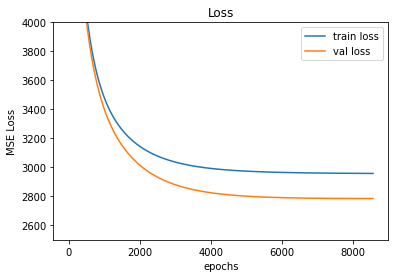

In [22]:
(beta_es, loss_train_history, loss_val_history) =\
gradient_descent_early_stopping(X_train_train, y_train_train, X_val, y_val, n_epochs=10000, eta=0.1)

plt.plot(loss_train_history, label='train loss')
plt.plot(loss_val_history, label='val loss')
plt.title('Loss')
plt.ylabel('MSE Loss')
plt.xlabel('epochs')
plt.ylim(ymin=2500, ymax=4000)
plt.legend()

## Minibatch descent

❓ Modify your gradient_descent function into a `minibatch_gradient_descent` one.

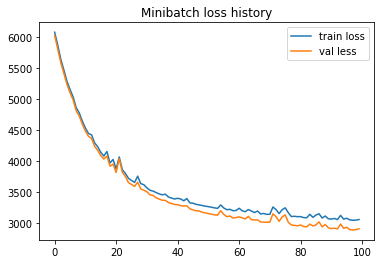

In [23]:
def minibatch_gradient_descent(X_train, y_train, X_test, y_test, batch_size=16, eta=eta, n_epochs=n_epochs):

 
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]
    beta = np.zeros((p,1)) 
    
    loss_train_history = []
    loss_test_history = []
    
    for epoch in range(n_epochs):
                
        # Shuffle your (X_train,y_train) dataset
        # $CHALLENGIFY_BEGIN
        indices = list(np.random.permutation(n_train))
        X_train_tmp = X_train[indices]
        y_train_tmp = np.array(y_train).reshape(-1,1)[indices]
        # $CHALLENGIFY_END
        
        # Loop over your dataset minibatch-per-minibatch, and for each mini-batch update your beta
        # $CHALLENGIFY_BEGIN
        for i in range(0,n_train,batch_size): # i = [0, 15, 31, ... n] 
            X_mini = X_train_tmp[i:i+batch_size]
            y_mini = y_train_tmp[i:i+batch_size]
            y_pred_mini = np.dot(X_mini,beta)
            gradients = 2/batch_size * np.dot(X_mini.T,(y_pred_mini - y_mini) )
            beta = beta - eta * gradients
        # $CHALLENGIFY_END
        
        # keep track of loss histories per epoch
        # $CHALLENGIFY_BEGIN
        y_pred_train = X_train_tmp.dot(beta)
        y_pred_test = X_test.dot(beta)
        
        errors_train = y_pred_train - y_train_tmp
        errors_test = y_pred_test - np.array(y_test).reshape(-1,1)

        loss_train = 1/n_train*np.dot(errors_train.T,errors_train)
        loss_test = 1/n_test*np.dot(errors_test.T,errors_test)
        loss_train_history.append(loss_train[0][0])
        loss_test_history.append(loss_test[0][0])
        # $CHALLENGIFY_END
        
    return beta, loss_train_history, loss_test_history

beta_mini, loss_train_history_mini, loss_val_history_mini =\
minibatch_gradient_descent(X_train_train, y_train_train, X_val, y_val,
                           batch_size=8,
                           n_epochs=100)

plt.plot(loss_train_history_mini, label='train loss')
plt.plot(loss_val_history_mini, label='val less')
plt.title('Minibatch loss history')
plt.legend()


❓ Plot the evolution of your train and val losses per epoch. What if you choose minibatch = 1?

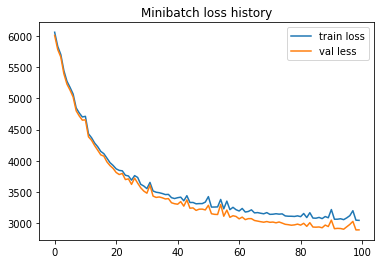

In [24]:
beta_mini, loss_train_history_mini, loss_val_history_mini =\
minibatch_gradient_descent(X_train_train, np.array(y_train_train), X_val, y_val,
                           batch_size=8,
                           n_epochs=100)

plt.plot(loss_train_history_mini, label='train loss')
plt.plot(loss_val_history_mini, label='val less')
plt.title('Minibatch loss history')
plt.legend()

❓ How would you adjust the early stopping criteria to account for these fluctuations?

<details>
    <summary>Hint</summary>

    
To avoid early stopping too early due to the stochastic nature of the minibatch descent, we could add a `patience` integer term, so that the algorithm only stops after val loss is increased for a sustained period of `patience` number of epochs.
</details>

## Conclusion: A new way to check for overfitting

<img src="https://github.com/lewagon/data-images/blob/master/ML/new_way_to_check_overfitting.png?raw=true">